In [1]:
using Plots, LinearAlgebra

In [18]:
function interp_nearest(xp::AbstractVector{T}, yp::AbstractVector{S}, x::Real) where {T<:Real, S<:Real}
    P = promote_type(eltype(yp), typeof(x))
    ind = findfirst(v->v>x, xp)
    if ind == 1 || ind == nothing
        return zero(P)
    else 
        return ((x-xp[ind]) > (xp[ind]-x)) ? xp[ind] : xp[ind+1]
    end
end

function interp_linear(xp::AbstractVector{T}, yp::AbstractVector{S}, x::Real) where {T<:Real, S<:Real}
    P = promote_type(eltype(yp), typeof(x))
    ind = findfirst(v->v>x, xp)
    if ind0 == 1 || ind0 == nothing
        return zero(P)
    else 
        ind = ind0-1
        return P((yp[ind+1]-yp[ind])/(xp[ind+1]-xp[ind]) *(x-xp[ind]) + yp[ind])
        
    end
end

function interp_cubic(xp::AbstractVector{T}, yp::AbstractVector{S}, x::Real) where {T<:Real, S<:Real}
    P = promote_type(eltype(yp), typeof(x))
    ind0 = findfirst(v->v>x, xp)
    if ind0 == 1 || ind0 == nothing
        return zero(P)
    else 
        ind = ind0-1
        return P((yp[ind+1]-yp[ind])/(xp[ind+1]-xp[ind]) *(x-xp[ind]) + yp[ind])
        
    end
end


interp_linear (generic function with 1 method)

In [43]:
xp = 0.0:1.0:15.0 
yp = cos.(xp) .* exp.(-xp/10.0)
xt = 0.0:0.1:15.0;

In [44]:
y1=[interp_nearest(xp, yp, t) for t in xt]
# y2=[begin interp_linear(xp, yp, t) end for t in xt]


BoundsError: BoundsError: attempt to access 16-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} at index [17]

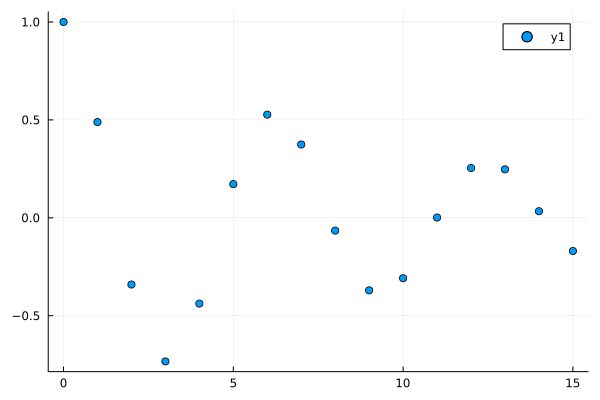

In [41]:
scatter(xp, yp)
# plot!(xt, y1)
# plot!(xt, y2)